# Lending Club Case Study
### Analyse the data, whether each new application will be get or rejected for the loan processing using Exploratory analysis.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
loan_data = pd.read_csv('loan.csv', header = 0, low_memory=False)

In [3]:
#checking the size of data
loan_data.shape

(39717, 111)

In [4]:
#checking the datatype
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [5]:
#checking first 5 elements in data
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# checking the describe of data
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Checking data has NA or invalid data

In [7]:
#checking each element has NA or invalid data 

for col in loan_data:
    print("{0}: {1}".format(col, loan_data[col].isnull().sum()))

id: 0
member_id: 0
loan_amnt: 0
funded_amnt: 0
funded_amnt_inv: 0
term: 0
int_rate: 0
installment: 0
grade: 0
sub_grade: 0
emp_title: 2459
emp_length: 1075
home_ownership: 0
annual_inc: 0
verification_status: 0
issue_d: 0
loan_status: 0
pymnt_plan: 0
url: 0
desc: 12940
purpose: 0
title: 11
zip_code: 0
addr_state: 0
dti: 0
delinq_2yrs: 0
earliest_cr_line: 0
inq_last_6mths: 0
mths_since_last_delinq: 25682
mths_since_last_record: 36931
open_acc: 0
pub_rec: 0
revol_bal: 0
revol_util: 50
total_acc: 0
initial_list_status: 0
out_prncp: 0
out_prncp_inv: 0
total_pymnt: 0
total_pymnt_inv: 0
total_rec_prncp: 0
total_rec_int: 0
total_rec_late_fee: 0
recoveries: 0
collection_recovery_fee: 0
last_pymnt_d: 71
last_pymnt_amnt: 0
next_pymnt_d: 38577
last_credit_pull_d: 2
collections_12_mths_ex_med: 56
mths_since_last_major_derog: 39717
policy_code: 0
application_type: 0
annual_inc_joint: 39717
dti_joint: 39717
verification_status_joint: 39717
acc_now_delinq: 0
tot_coll_amt: 39717
tot_cur_bal: 39717
ope

## Check and Drop the data has only unique & NA


In [8]:
#segregating the demographic and loan related columns (as continuous and categorical columns)

con_colns = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', \
             'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', \
             'total_pymnt', 'total_pymnt_inv',  'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', \
             'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code']
cat_colns = ['title', 'emp_length' ,'zip_code', 'addr_state','term', 'int_rate', 'grade', 'sub_grade', 'home_ownership', \
             'verification_status', 'issue_d', 'loan_status', 'earliest_cr_line', 'revol_util', 'initial_list_status', \
             'last_pymnt_d', 'last_credit_pull_d', 'purpose']

select_coln = cat_colns + con_colns
loan_data2 = loan_data[select_coln]
loan_data2.shape

(39717, 43)

In [9]:
#Checking whether column has 'nan' value or not

for col in loan_data2:
    null_len = loan_data2[col].isnull().sum()
    if (null_len > 0):
        print("{0}: {1}".format(col, loan_data2[col].unique()))

title: ['Computer' 'bike' 'real estate business' ... 'Retiring credit card debt'
 'MBA Loan Consolidation' 'JAL Loan']
emp_length: ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
revol_util: ['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']
last_pymnt_d: ['Jan-15' 'Apr-13' 'Jun-14' 'May-16' 'Apr-12' 'Nov-12' 'Jun-13' 'Sep-13'
 'Jul-12' 'Oct-13' 'May-13' 'Feb-15' 'Aug-15' 'Oct-12' 'Sep-12' nan
 'Dec-12' 'Dec-14' 'Aug-13' 'Nov-13' 'Jan-14' 'Apr-14' 'Aug-14' 'Oct-14'
 'Aug-12' 'Jul-14' 'Jul-13' 'Jan-16' 'Feb-16' 'Apr-15' 'Feb-14' 'Sep-14'
 'Jun-12' 'Feb-13' 'Mar-13' 'May-14' 'Mar-15' 'Jan-13' 'Dec-13' 'Feb-12'
 'Mar-14' 'Sep-15' 'Nov-15' 'Mar-16' 'Jan-12' 'Oct-15' 'Nov-14' 'Mar-12'
 'May-12' 'Apr-16' 'Dec-15' 'Jun-15' 'May-15' 'Jul-15' 'Dec-11' 'Nov-11'
 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11' 'Apr-11' 'Mar-11'
 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10' 'Aug-10' 'Jul-10'
 'Jun-10' 'May-

In [10]:
#Check the maximum occurance of elements which has 'nan' value

for col in loan_data2:
    null_len = loan_data2[col].isnull().sum()
    if (null_len > 0):
        print("{0}: {1}".format(col, loan_data2[col].mode()[0]))

title: Debt Consolidation
emp_length: 10+ years
revol_util: 0%
last_pymnt_d: May-16
last_credit_pull_d: May-16


In [11]:
# checking the number of invidual elements for employment length
loan_data2['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [12]:
loan_data2['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [13]:
loan_data2['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

##  Parsing and converting data type (Continuous variables)

In [14]:
#imputing the via maximum occurance value for employment length

loan_data2.emp_length.fillna(loan_data2['emp_length'].mode()[0], inplace=True)

/var/folders/35/pmwqgjkj2rl0sqpqjpjcrk980000gn/T/ipykernel_780/2546272033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data2.emp_length.fillna(loan_data2['emp_length'].mode()[0], inplace=True)


In [15]:
#remove the unnecessary characters and convert the employment length, interest rate as proper data type

loan_data2.emp_length = loan_data2.emp_length.apply(lambda x: str(0) if '<' in x else str("".join(re.findall(r'\d+', x)))).astype("int64")
loan_data2.int_rate = loan_data2.int_rate.apply(lambda x:  str("".join(re.findall(r'\d+\.\d+', x)))).astype("float64")

/var/folders/35/pmwqgjkj2rl0sqpqjpjcrk980000gn/T/ipykernel_780/3477163534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data2.emp_length = loan_data2.emp_length.apply(lambda x: str(0) if '<' in x else str("".join(re.findall(r'\d+', x)))).astype("int64")
/var/folders/35/pmwqgjkj2rl0sqpqjpjcrk980000gn/T/ipykernel_780/3477163534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data2.int_rate = loan_data2.int_rate.apply(lambda x:  str("".join(re.findall(r'\d+\.\d+', x)))).astype("float64")


## Finding Outliers & Cleanup

In [16]:
loan_data2[con_colns].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,1.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,1.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,1.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,1.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0


In [17]:
#removing the who got already approved the loan and "current" paying the loan
loan_data2 = loan_data2[loan_data2['loan_status'] != "Current"]

(38577, 43)


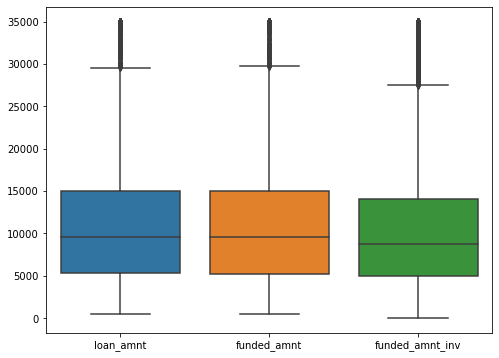

In [18]:
#finding the outlier values for loan amount, funded amount, inverstor funded amount

print (loan_data2.shape)
plt.figure(figsize = [8,6])
ax = sns.boxplot(data = loan_data2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']])
plt.show()

In [19]:
#removing the outlier values for investor funded amount

IQR = loan_data2.loan_amnt.quantile(0.75) - loan_data2.funded_amnt_inv.quantile(0.25)

LW = loan_data2.loan_amnt.quantile(0.25) - (1.5 * IQR)
HW = loan_data2.loan_amnt.quantile(0.75) + (1.5 * IQR)

loan_data2 = loan_data2[(loan_data2.loan_amnt >= LW) & (loan_data2.loan_amnt <= HW)]

print (LW, HW)
loan_data2.shape

-9700.0 30000.0


(37842, 43)

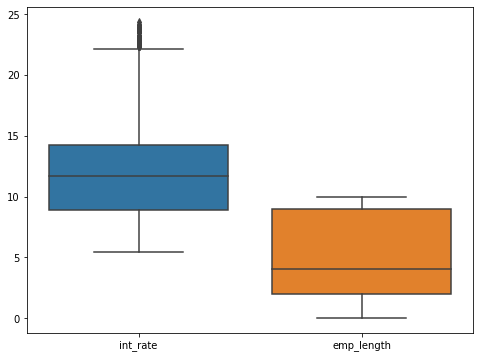

(37842, 43)

In [20]:
#trying to figure out the outlier values for interest rate and employment length

plt.figure(figsize = [8,6])
ax = sns.boxplot(data = loan_data2[['int_rate', 'emp_length']])
plt.show()
loan_data2.shape

In [21]:
loan_data2['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [22]:
#parse the loan issue column and add as new column for year & month

loan_data2['issue_d_year'] = pd.to_datetime(loan_data2['issue_d'].str.lower(), format="%b-%y").dt.year

In [23]:
loan_data2['issue_d_month'] = pd.to_datetime(loan_data2['issue_d'].str.lower(), format="%b-%y").dt.month

In [24]:
loan_data2[['issue_d_month', 'issue_d_year']].head()

,issue_d_month,issue_d_year
0,12,2011
1,12,2011
2,12,2011
3,12,2011
5,12,2011


In [25]:
#parsing the term and added as new column
loan_data2['term_month'] = loan_data2.term.apply(lambda x: int("".join(re.findall(r'\d+', x))) )

In [26]:
#parsing the loan status and added new column as continuous variable for data analysis.
loan_data2['loan_status_int'] = loan_data2.loan_status.apply(lambda x: 1 if x == "Fully Paid" else  0)

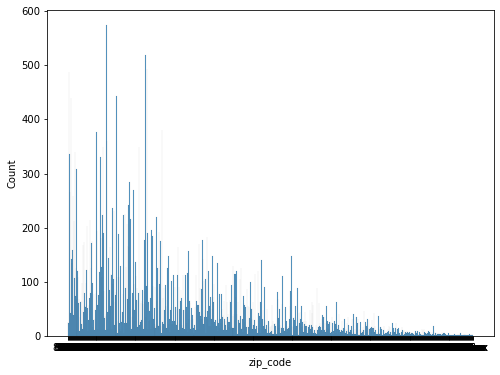

In [27]:
#Plotting histogram for zip code

plt.figure(figsize = [8,6])
sns.histplot(loan_data2.zip_code)
plt.show()

In [28]:
#parsing the zip code as integer type for processing if required

loan_data2.zip_code = loan_data2.zip_code.apply(lambda x: x[:3]).astype("int64")

In [29]:
# Based on above plot for DTI, there is outliers on both range, based on this calculation ignoring the outliers.
# I have used the scale values as 0.4 rather than 1.5

IQR = loan_data2.dti.quantile(0.75) - loan_data2.dti.quantile(0.25)

LW = loan_data2.dti.quantile(0.25) - (0.4 * IQR)
HW = loan_data2.dti.quantile(0.75) + (0.4 * IQR)

print(LW, HW)
loan_data2 = loan_data2[(loan_data2.dti >= LW) & (loan_data2.dti <= HW)]
loan_data2.shape

3.943999999999999 22.735999999999997


(31015, 47)

In [30]:
#Binning the loan amount, inverstor funded amount data interms of 1000 (K)

loan_data2['loan_amnt_k'] = loan_data2['loan_amnt'].apply(lambda x: int(x/2000))
loan_data2['funded_amnt_inv_k'] = loan_data2['funded_amnt_inv'].apply(lambda x: int(x/2000))
loan_data2['loan_amnt_k'].describe()

count    31015.000000
mean         5.072675
std          3.377136
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         15.000000
Name: loan_amnt_k, dtype: float64

In [31]:
#Loan amount to categorical column
def loan_amount_catg(loan_data2) :
    if loan_data2['loan_amnt'] <= 5000 :
        return "Tenure_0-5k"
    elif (loan_data2['loan_amnt'] > 5000) & (loan_data2['loan_amnt'] <= 10000 ):
        return "Tenure_5k-10k"
    elif (loan_data2['loan_amnt'] > 10000) & (loan_data2['loan_amnt'] <= 15000) :
        return "Tenure_10k-15k"
    elif (loan_data2['loan_amnt'] > 15000) & (loan_data2['loan_amnt'] <= 20000) :
        return "Tenure_15k-20k"
    elif (loan_data2['loan_amnt'] > 20000) & (loan_data2['loan_amnt'] <= 25000) :
        return "Tenure_20k-25k"
    elif (loan_data2['loan_amnt'] > 25000) & (loan_data2['loan_amnt'] <= 30000) :
        return "Tenure_25k-30k"
    else :
        return "Tenure_gt_30k"
    
loan_data2['loan_amnt_group'] = loan_data2.apply(lambda loan_data2:loan_amount_catg(loan_data2), axis = 1)

In [32]:
loan_data2['loan_amnt_group'].value_counts()

Tenure_5k-10k     10466
Tenure_0-5k        7421
Tenure_10k-15k     6506
Tenure_15k-20k     3659
Tenure_20k-25k     2391
Tenure_25k-30k      572
Name: loan_amnt_group, dtype: int64

In [33]:
loan_data2.addr_state.value_counts()

CA    5592
NY    2927
FL    2217
TX    2116
NJ    1433
PA    1209
IL    1204
VA    1118
GA    1080
MA    1070
OH     937
MD     836
AZ     679
WA     678
CO     613
CT     596
NC     596
MI     571
MO     528
MN     503
NV     385
SC     367
OR     356
WI     355
LA     339
AL     334
KY     242
OK     232
KS     200
UT     191
DC     181
AR     179
RI     161
WV     147
NM     144
NH     137
HI     122
DE      97
MT      67
WY      66
AK      63
SD      56
VT      42
MS      15
TN      14
IN       8
NE       5
ID       4
IA       3
Name: addr_state, dtype: int64

In [34]:
#Filter the 'addr_state' data considering mininum number (ex: 100) of applictions 

statedata = dict(loan_data2.addr_state.value_counts())

def enable_state(x, statedata):
    num_of_appl = int(statedata[x])
    if num_of_appl > 100:
        return True
    else:
        return False
    
zip_flag = loan_data2.addr_state.apply(lambda x: enable_state(x, statedata))
loan_data2.addr_state.value_counts()

loan_data2 = loan_data2[zip_flag == True]
loan_data2.shape

(30575, 50)

## Analysing the loan applicaiton eligiblity based on data

## Univariate Analysis

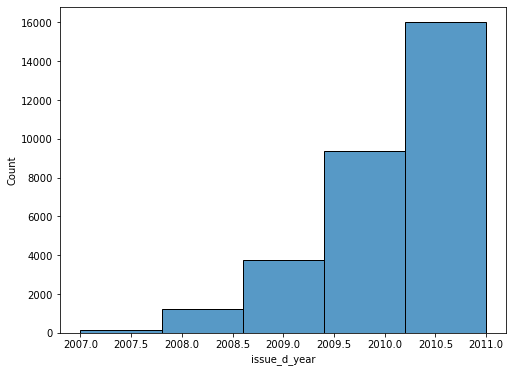

In [35]:
plt.figure(figsize = [8, 6])
ax = sns.histplot(loan_data2.issue_d_year, bins = 5)
plt.show()

### Insight1: Loans are processed by the Bank is lineraly increasing from 2007 to 2011.

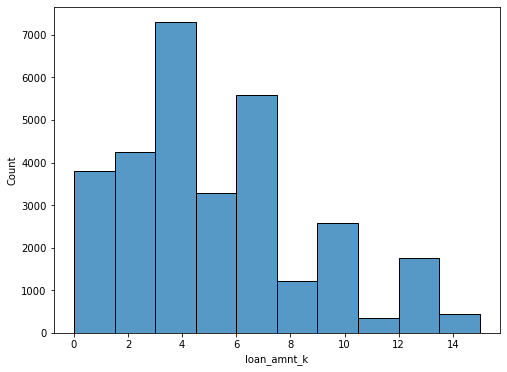

In [36]:
plt.figure(figsize = [8, 6])
sns.histplot(loan_data2['loan_amnt_k'], bins = 10)
plt.show()

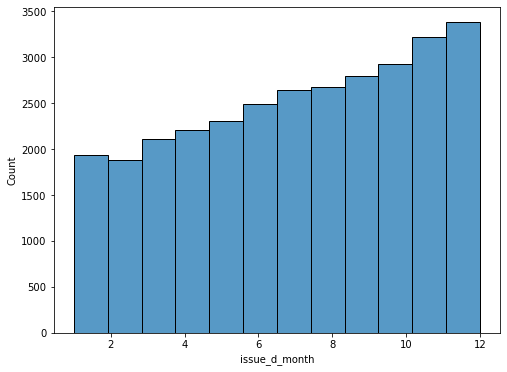

In [37]:
plt.figure(figsize = [8, 6])
sns.histplot(loan_data2['issue_d_month'], bins=12)
plt.show()

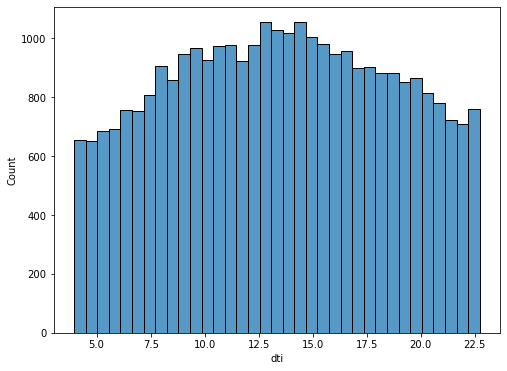

In [38]:
#finding th average interest 
plt.figure(figsize = [8,6])
sns.histplot(loan_data2.dti)
plt.show()

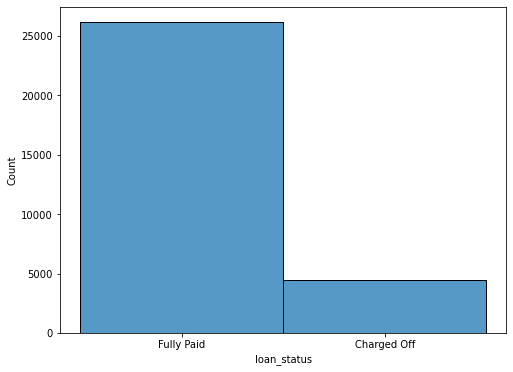

In [39]:
plt.figure(figsize = [8,6])
sns.histplot(loan_data2.loan_status, bins = 2)
plt.show()

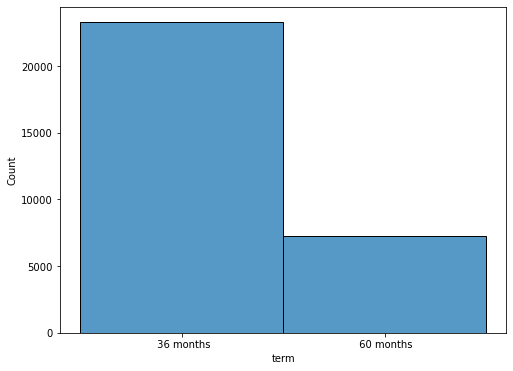

In [40]:
plt.figure(figsize = [8,6])
sns.histplot(loan_data2.term, bins = 2)
plt.show()

### Insight: More number of loans are applied for Short terms (3 year) rather than 5 year term.

## Bivariate Analysis

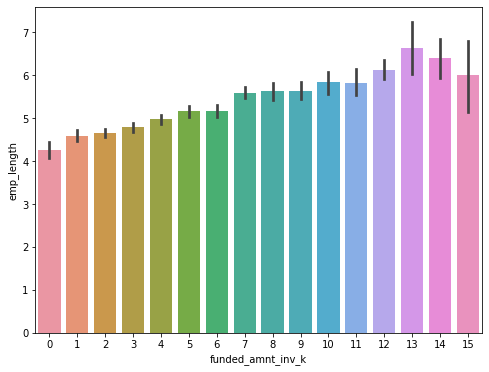

In [41]:
plt.figure(figsize = [8,6])
ax = sns.barplot(x = loan_data2.funded_amnt_inv_k, y = loan_data2.emp_length)
plt.show()

### Insight: when the applicant has long employment, they apply for high loan amount.

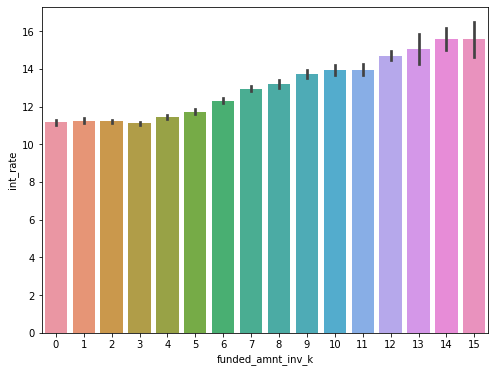

In [42]:
plt.figure(figsize = [8,6])
ax = sns.barplot(x = loan_data2.funded_amnt_inv_k, y = loan_data2.int_rate)
plt.show()

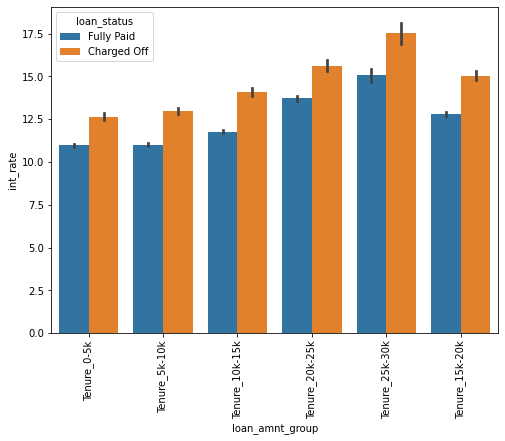

In [43]:
plt.figure(figsize = [8,6])
ax = sns.barplot(x = loan_data2.loan_amnt_group, y = loan_data2.int_rate, hue = loan_data2.loan_status)
plt.xticks(rotation = 90)
plt.show()

### Insight: when loan amount & interest rate is high, there is high number of applicats are charged off i.e. defaulting of loan.

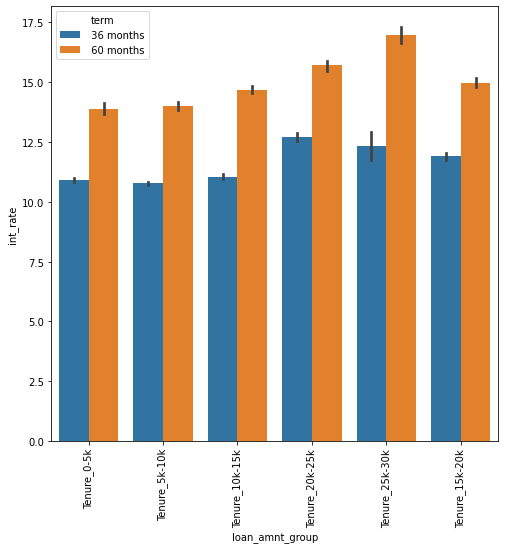

In [44]:
plt.figure(figsize = [8,8])
ax = sns.barplot(x = loan_data2.loan_amnt_group, y = loan_data2.int_rate, hue = loan_data2.term)
plt.xticks(rotation = 90)
plt.show()

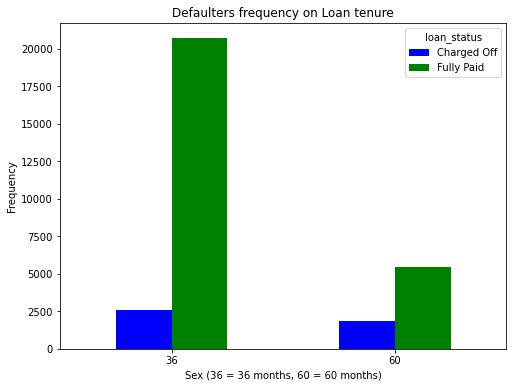

In [45]:
pd.crosstab(loan_data2.term_month, loan_data2.loan_status).plot(kind="bar",figsize=(8,6),color=['blue','green' ])
plt.title('Defaulters frequency on Loan tenure')
plt.xlabel('Sex (36 = 36 months, 60 = 60 months)')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

### Insight: 36 months term has higher fully paid and charged off than 60 months term.

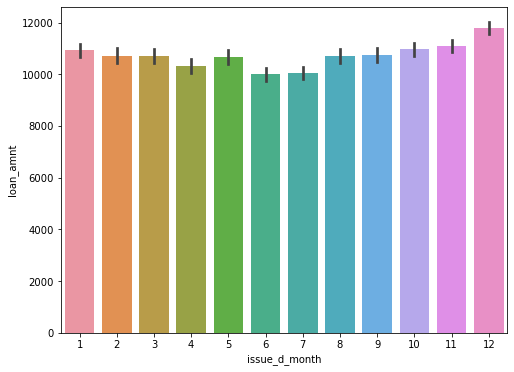

In [46]:
plt.figure(figsize = [8, 6])
ax = sns.barplot(x = loan_data2.issue_d_month, y = loan_data2.loan_amnt)
plt.show()

### Insight: In a year, on December, highest number of loans are issued and on June, it is lowest.

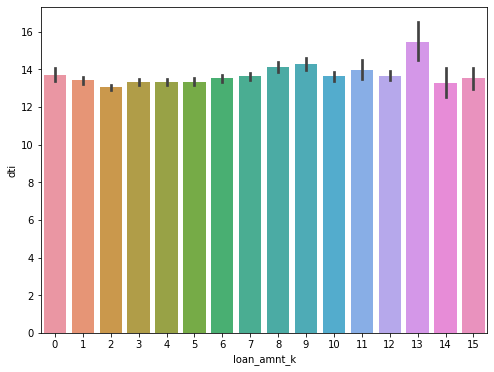

In [47]:
plt.figure(figsize = [8, 6])
sns.barplot(x = loan_data2['loan_amnt_k'], y = loan_data2['dti'])
plt.show()

### Insight: When the loan applicant has higher Debit to Income (DTI), they apply for very "high" loan amount. This applications can be scrutinized or might be rejected.

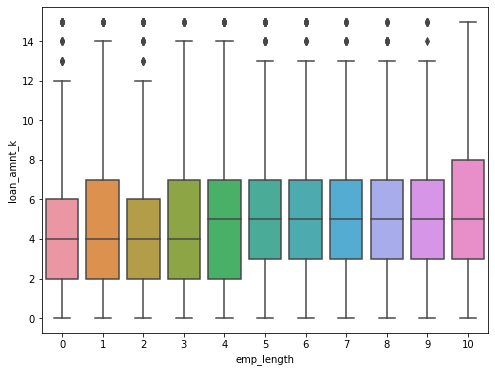

In [48]:
plt.figure(figsize = [8, 6])
sns.boxplot(x = loan_data2['emp_length'], y = loan_data2['loan_amnt_k'])
plt.show()

### Insight: Applicant who has less than a year employed is applying for higher loan amount. So it an be considered to scrutinize or reject the applicaiton.

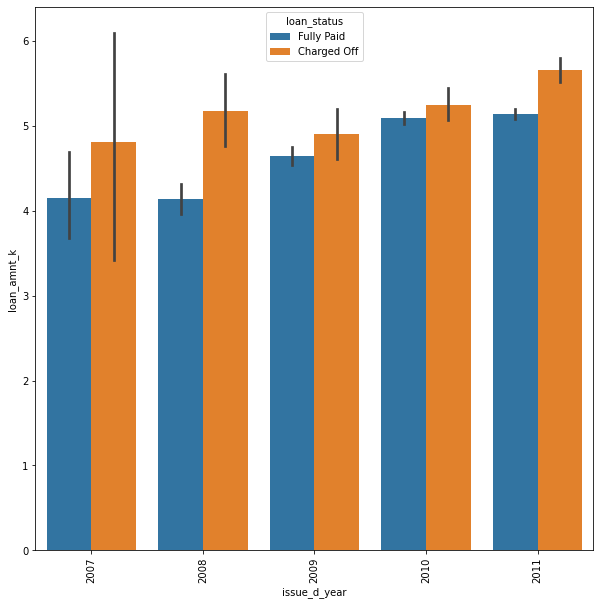

In [49]:
plt.figure(figsize = [10, 10])
sns.barplot(y = loan_data2['loan_amnt_k'], x = loan_data2['issue_d_year'], hue = loan_data2['loan_status'])
plt.xticks(rotation=90)
plt.show()

In [50]:
#checking by group the address and zipcode and counting how many elements each has

plt.figure(figsize = [10, 10])
loan_data2.groupby(['addr_state', 'zip_code']).size().reset_index()

,addr_state,zip_code,0
0,AL,350,43
1,AL,351,28
2,AL,352,45
3,AL,353,1
4,AL,354,17
...,...,...,...
778,WV,265,12
779,WV,266,1
780,WV,267,2
781,WV,268,5


<Figure size 720x720 with 0 Axes>

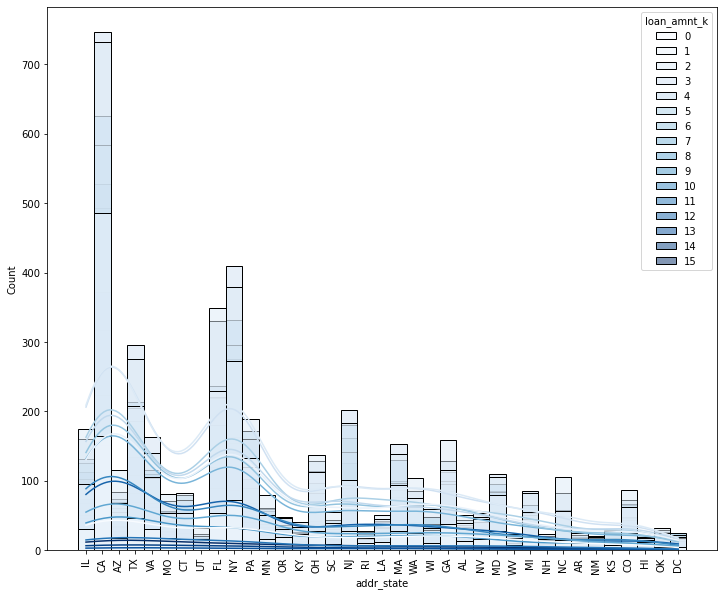

In [51]:
plt.figure(figsize = [12, 10])
sns.histplot(x = loan_data2['addr_state'], hue = loan_data2['loan_amnt_k'], palette = sns.color_palette("Blues", as_cmap=True), kde=True)
plt.xticks(rotation=90) 
plt.show()

### Insights5: Based on state wise, fewer states like CA, NY, FL, TX, NJ are processsing high number of loans.

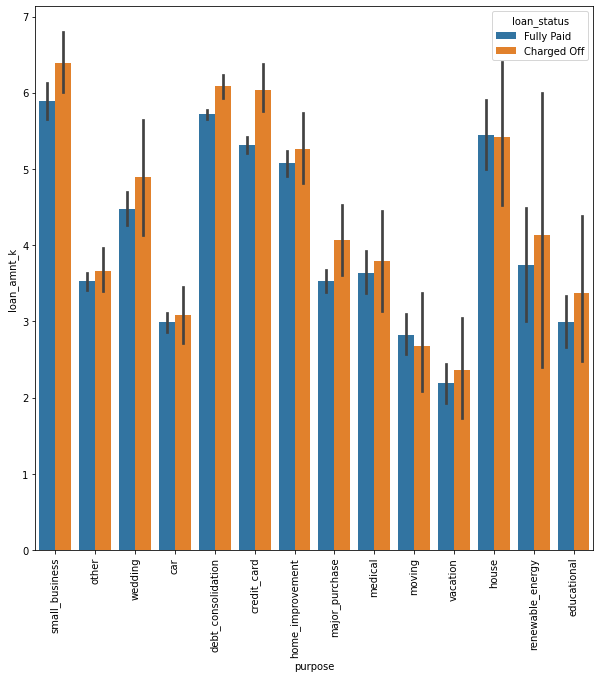

In [52]:
plt.figure(figsize = [10, 10])
sns.barplot(y = loan_data2['loan_amnt_k'], x = loan_data2['purpose'], hue = loan_data2['loan_status'])
plt.xticks(rotation=90)
plt.show()

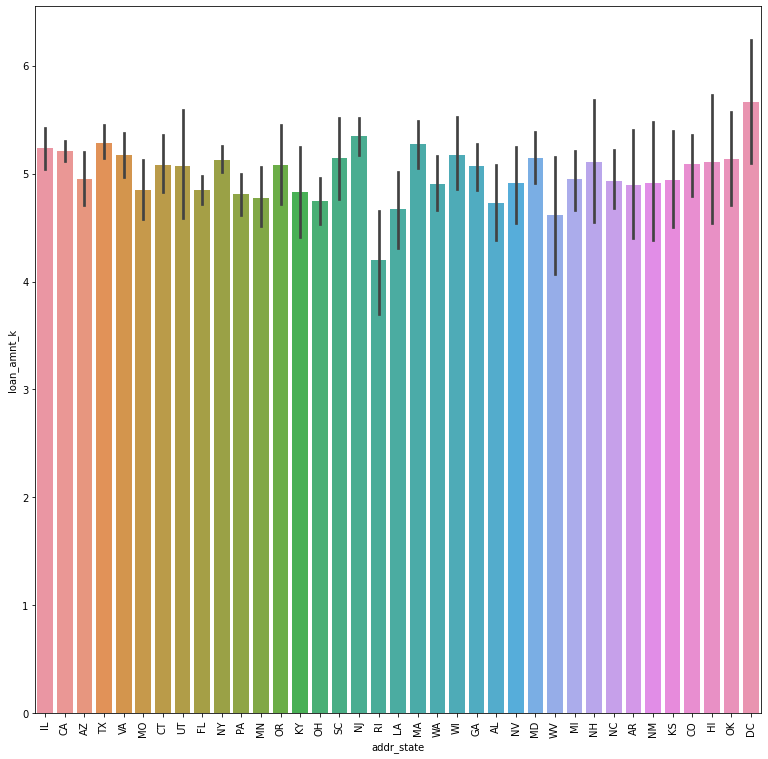

In [53]:
plt.figure(figsize = [13, 13])
sns.barplot( x = loan_data2['addr_state'], y = loan_data2['loan_amnt_k'])
plt.xticks(rotation=90)
plt.show()

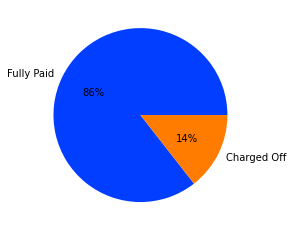

In [55]:
loan_plot_pie = dict(loan_data2['loan_status'].value_counts())
plt.pie(loan_plot_pie.values(), labels = loan_plot_pie.keys(), colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.show()